# Retrieving netCDF data from the CDS and plotting it with Metview

<img src="https://cds.climate.copernicus.eu/sites/default/files/inline-images/c3s-logo%20%281%29.png" width=140> 
<img src="https://www.unidata.ucar.edu/images/logos/netcdf-50x50.png" width=40> 
Demonstrates how to retrieve netCDF data from the [Climate Data Store](https://cds.climate.copernicus.eu/) (CDS) and visualise it with [Metview](https://confluence.ecmwf.int/display/METV) using automatic styling and a polar stereographic projection.

In [8]:
import metview as mv
import cdsapi

Retrieves ERA5 instantaneous 10 metre wind gust data in netCDF format using the [CDS API](https://cds.climate.copernicus.eu/api-how-to) (access needs to be set up first).
If you do not have access to the CDS-API then initialise variable use_cds = False.
A copy of the data is provided on disk.

In [ ]:
use_cds = True
if use_cds:
    c = cdsapi.Client()
    c.retrieve("reanalysis-era5-pressure-levels",
               {
                   "variable": "instantaneous_10m_wind_gust",
                   "product_type": "reanalysis",
                   "year": "2011",
                   "month": "08",
                   "day": "01",
                   "time": "00:00",
                   "format": "netcdf"
               },
               "wgust_era5.nc")

Reads the netCDF data from disk.

In [9]:
ncdata = mv.read('./wgust_era5.nc')

Defines the netCDF variable to be visualised using the [Metview's netCDF visualiser](https://confluence.ecmwf.int/display/METV/NetCDF+Visualiser) icon.

In [10]:
ncvis = mv.netcdf_visualiser(
    netcdf_plot_type          = "geo_matrix",
    netcdf_data               = ncdata,
    netcdf_latitude_variable  = "latitude",
    netcdf_longitude_variable = "longitude",
    netcdf_value_variable     = "i10fg"
    )

Defines a Geographical View to customise parameters like map projection and geographical area.

In [11]:
geoview = mv.geoview(
    map_projection      = "polar_stereographic",
    map_area_definition = "corners",
    area                = [33,-13,49,64]    #[S,W,N,E]
    )

Sets up the [contouring style](https://confluence.ecmwf.int/display/METV/Contouring) which provides much flexibility in choosing how to display the output data. It controls features such as isolines, shading and colour schemes. Here, we use a Magics automatic styling.

In [12]:
cont = mv.mcont(
    contour_automatic_setting = "style_name",
    contour_style_name        = "sh_all_f03t70_beauf",
    legend                    = "on"
    )

To plot this, we first need to tell Metview to send the plot to Jupyter.

In [13]:
mv.setoutput('jupyter')

Plot the netcdf data into a customised Geographical View and contouring style.

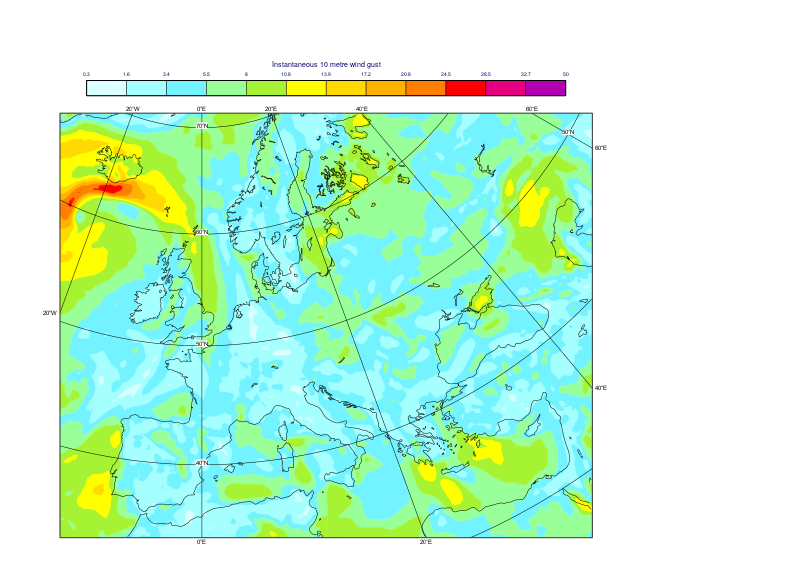

In [7]:
mv.plot(geoview, ncvis, cont)

# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)
- [Gallery examples](https://confluence.ecmwf.int/display/METV/Gallery)